In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from collections import Counter

In [91]:
iris = datasets.load_iris()
df = pd.DataFrame(
    iris.data,
    columns = iris.feature_names
)
df["label"] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [92]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.8,1.5,0.3,0
1,6.9,3.2,5.7,2.3,2
2,6.7,3.3,5.7,2.5,2
3,5.2,2.7,3.9,1.4,1
4,5.0,3.5,1.6,0.6,0


In [93]:
train_size = 75
train_data = df.iloc[:train_size].values
test_data = df.iloc[train_size:].values

In [94]:
def knn(k, train_data, test_data):
    labels = []

    for test in test_data:

        # 1. すべてのトレインデータとtest（このループステップでラベルを予測したいデータ）との距離を計算したリストを作る
        distances = np.sum((train_data[:,:-1]-test[:-1])**2, axis=1)

        # 2. 距離リストの値が小さい順に並べた、トレインデータのインデックスを持つリストを作る
        sorted_train_indexes = np.argsort(distances)

        # 3. インデックスリストを元に、testから近いk個のトレインデータのラベルを取り出す
        sorted_k_labels = train_data[sorted_train_indexes, -1][:k]

        # 4. sorted_k_labelsの中で最も数の多かったlabelを取り出す
        label = Counter(sorted_k_labels).most_common(1)[0][0]
        labels.append(label)
    return labels

In [95]:
pred_labels = knn(2, train_data, test_data)

In [96]:
np.sum(pred_labels == test_data[:,-1]) / len(test_data)
     
# 出力結果
#0.9733333333333334

0.9333333333333333

Text(0.5, 1.0, 'true label')

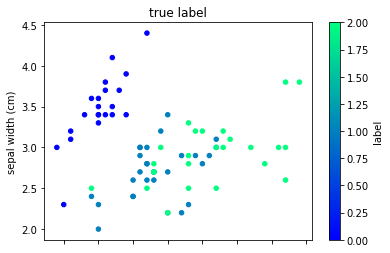

In [97]:
test_df = df.iloc[train_size:].copy()
test_df["pred_label"] = pred_labels

test_df.plot(kind="scatter", x=0,y=1,c="label", cmap="winter")
plt.title("true label")

Automatically created module for IPython interactive environment


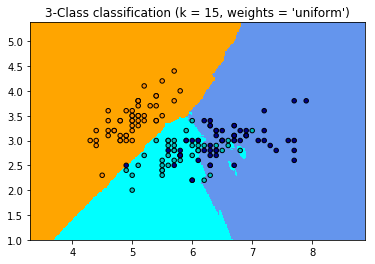

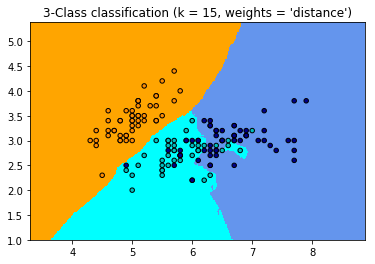

In [98]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()